In [ ]:
## Importing all the required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon
from collections import Counter
from google.colab import drive

In [ ]:
## Connecting to drive for loading the data
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Function to compute the exponential distribution
def exponential_distribution(x,lamb):
  return (
      1 - np.exp(-lamb*x)
  )

In [ ]:
## Function to compute the uniform distribution
def uniform_distribution(x):
  return x

In [ ]:
def question_1():
  n_values = [100,1000,5000] ##Taking different values of n
  lam = 2
  for n in n_values:
    exp_samples = np.random.exponential(scale=1/lam,size=n) ##Generating the samples for exponential
    uni_samples = np.random.uniform(low=0,high=1,size=n) ##Generating the samples for uniform
    y_exp = exponential_distribution(exp_samples,lam) ##Finding the y values for exponential samples
    y_uni = uniform_distribution(uni_samples) ##Finding the y values for uniform samples

    plt.figure(figsize=(12,6)) ##Plotting

    plt.subplot(1,2,1) ## Plotting the exponential
    sns.histplot(y_exp,kde=True,bins=30,color="blue",label=f"n={n}")
    plt.title(f"Histogram of Y for exponential (n={n})")
    plt.xlabel("Y")
    plt.ylabel("Frequency")
    plt.legend()

    plt.subplot(1,2,2) ## Plotting the uniform
    sns.histplot(y_uni,kde=True,bins=30,color="green",label=f"n={n}")
    plt.title(f"Histogram of Y for uniform (n={n})")
    plt.xlabel("Y")
    plt.ylabel("Frequency")
    plt.legend()

    plt.tight_layout()
    plt.show()

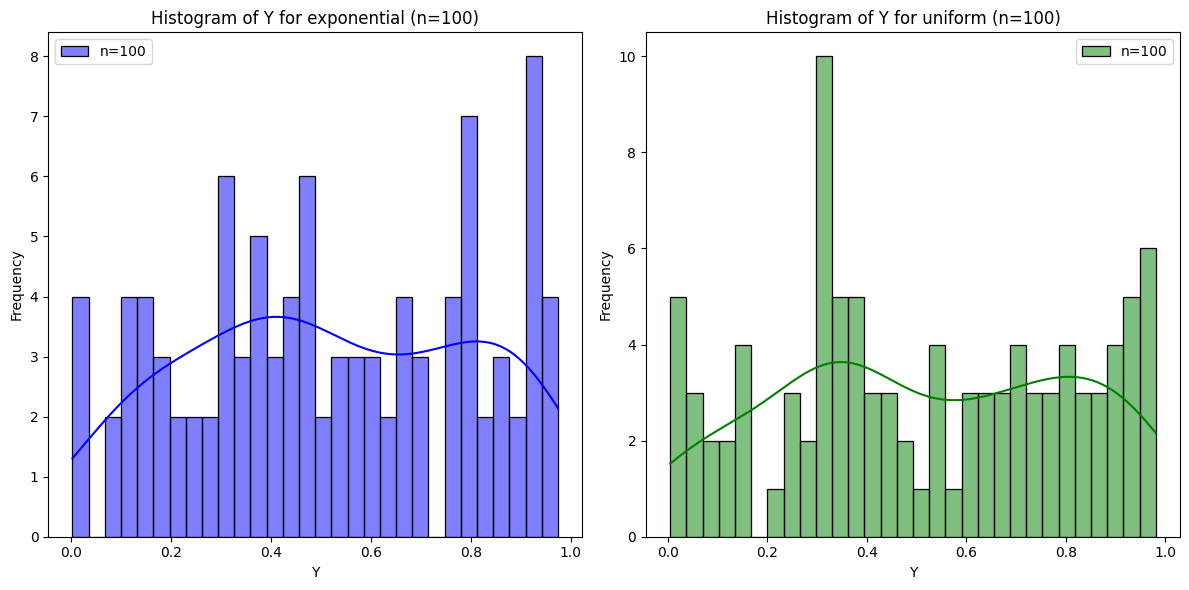

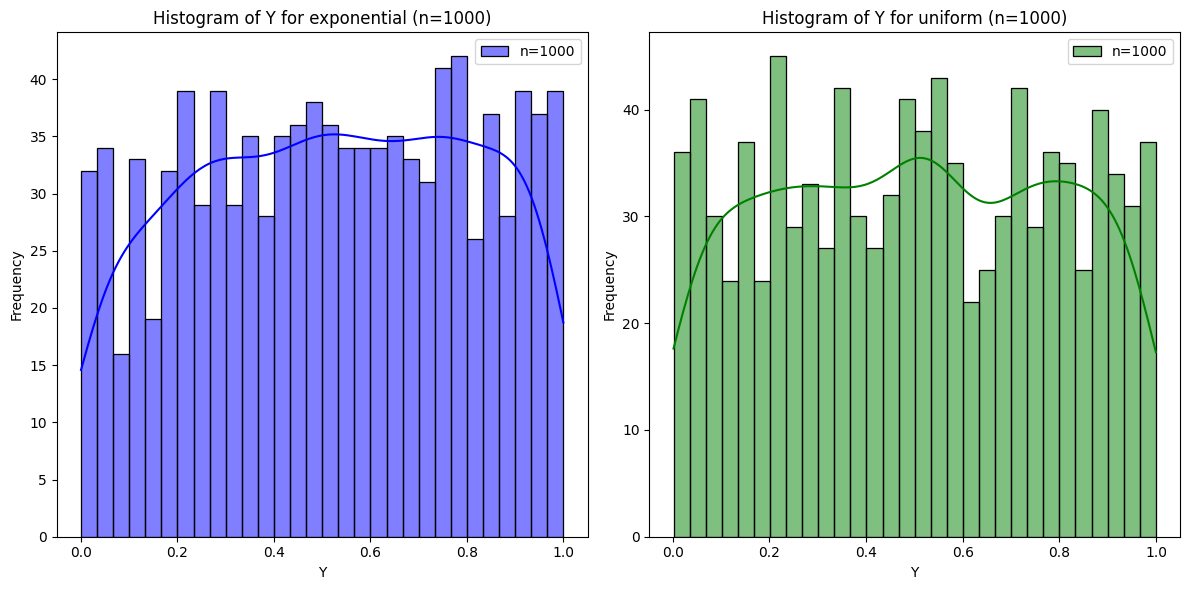

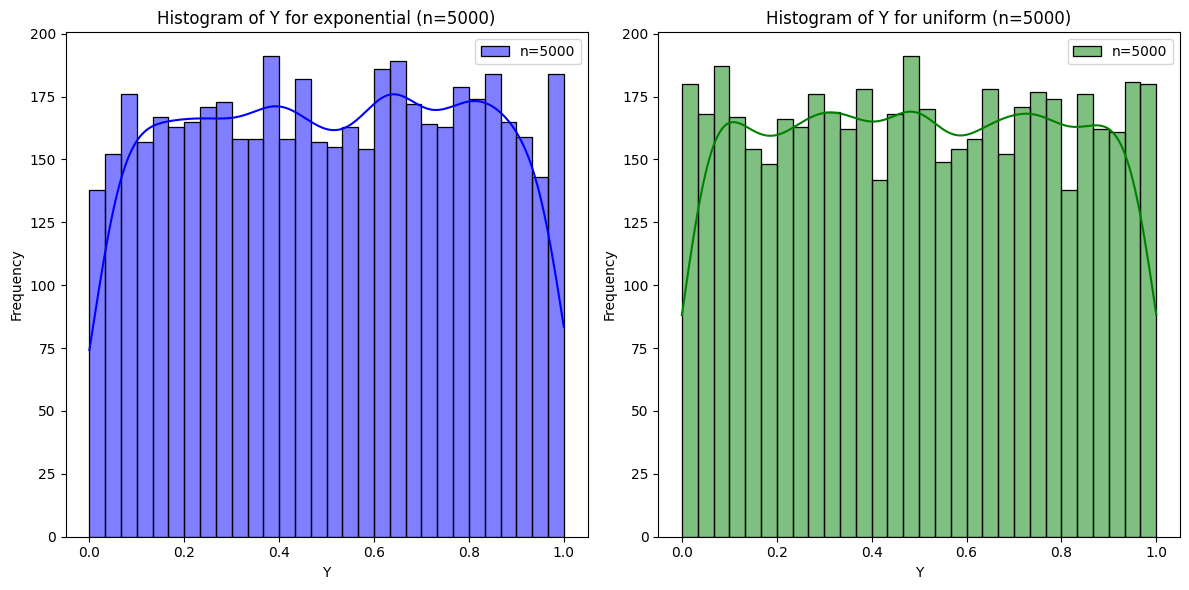

In [ ]:
question_1()

In [ ]:
def question_2(file_path):
  with open(file_path,"r") as file: ## Defining the file object
    content = file.read().lower()  ## Reading the content of the file and converting to lower case
  words = content.split() ## Splitting the content to form the words list
  words_count = Counter(words) ## Counting the frequency of words
  top_30_words = words_count.most_common(30) ## Finding the word-freq pair with the top 30 words having highest frequency
  words, freqs = zip(*top_30_words) ## Unzipping the pairs list to generate different lsits
  cdf = np.cumsum(freqs)/sum(freqs) ## Finding the cdf

  plt.figure(figsize=(12,6)) ## Plotting

  plt.subplot(1,2,1) ## Plotting the words on x axis and frequencies on y axis
  sns.barplot(x=list(words),y=list(freqs),palette="viridis")
  plt.xticks(rotation=45)
  plt.title("Top 30 Words Frequencies")
  plt.xlabel("Words")
  plt.ylabel("Frequency")

  plt.subplot(1,2,2) ## Plotting the ranks on x axis and cdf on y axis
  plt.plot(range(1,len(cdf)+1), cdf, marker='o', color="blue", label="CDF")
  plt.title("CDF of Top 30 Words")
  plt.xlabel("Rank")
  plt.ylabel("CDF")
  plt.legend()

  plt.tight_layout()
  plt.show()


<ipython-input-33-fdfe5e8110b1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words),y=list(freqs),palette="viridis")


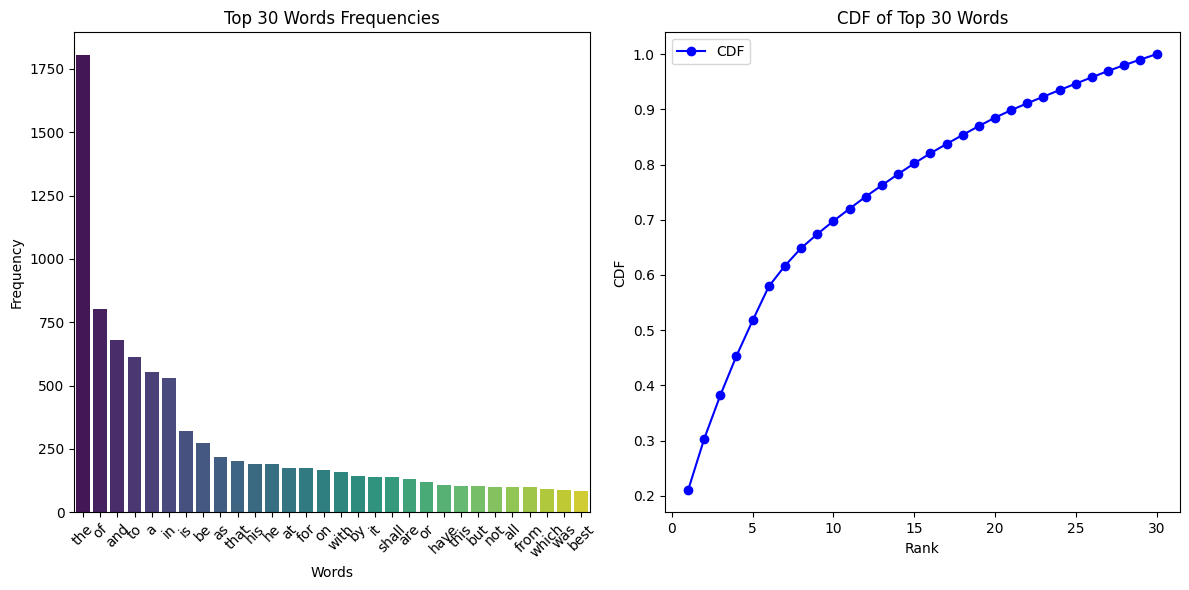

In [ ]:
file_path = "/content/drive/MyDrive/Course Work/Sem 4/Statistical Programming/Assignment 2/text_file.txt"
question_2(file_path)

In [ ]:
def custom_pdf(x):
  return x ## Computing the custom pdf

In [ ]:
def custom_cdf_inverse(u):
  return np.sqrt(2*u) ## Computing the inverse  of the custom cdf

In [ ]:
def question_3():
  n = 1000
  uniform_samples = np.random.uniform(0,1,size=n) ## Generating the samples for the uniform distribution
  exp_inverse_cdf = -np.log(1-uniform_samples) / 2 ## Finding the inverse cdf of the exponential distribution
  custom_inverse_cdf = custom_cdf_inverse(uniform_samples) ## Finding the inverse cdf of the custom distribution

  plt.figure(figsize=(12,6)) ## Plotting

  plt.subplot(1,2,1) ## Plotting the inverse cdf for the exponential distribution
  sns.histplot(exp_inverse_cdf,kde=True,bins=30,color="orange",label="Exponential")
  plt.title("Transformed Random Variable (Exponential)")
  plt.xlabel("Y")
  plt.ylabel("Frequency")
  plt.legend()

  plt.subplot(1,2,2) ## Plotting the inverse cdf for the custom distribution
  sns.histplot(custom_inverse_cdf,kde=True,bins=30,color="purple",label="Custom")
  plt.title("Transformed Random Variable (Custom)")
  plt.xlabel("Y")
  plt.ylabel("Frequency")
  plt.legend()

  plt.tight_layout()
  plt.show()

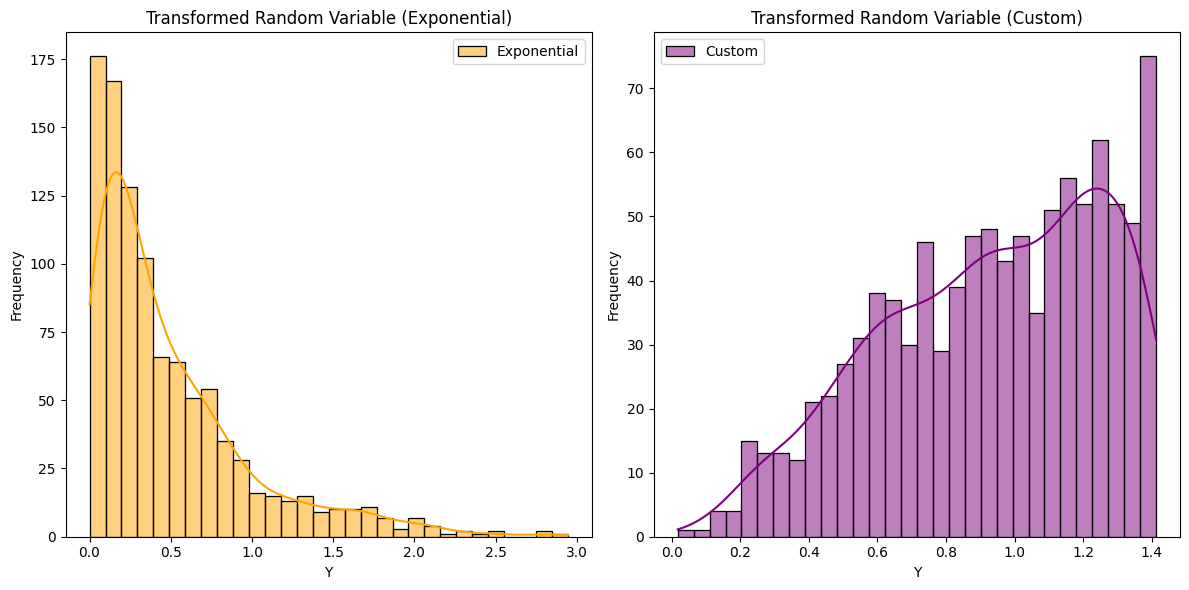

In [ ]:
question_3()